In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [0]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1) 
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
# Number of classes
K = len(set(y_train)) # checking number of unique elements of y_train
print("Number of classes: ", K)

Number of classes:  10


In [0]:
# Build the model using Keras functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x) # increasing feature maps at each layer 32>64>128
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x) #single input, single output

In [0]:
if tf.test.gpu_device_name():
  print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [0]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 132us/sample - loss: 0.5235 - accuracy: 0.8077 - val_loss: 0.4018 - val_accuracy: 0.8463
Epoch 2/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3592 - accuracy: 0.8661 - val_loss: 0.3452 - val_accuracy: 0.8693
Epoch 3/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3082 - accuracy: 0.8853 - val_loss: 0.3181 - val_accuracy: 0.8829
Epoch 4/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2761 - accuracy: 0.8959 - val_loss: 0.3070 - val_accuracy: 0.8894
Epoch 5/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2497 - accuracy: 0.9051 - val_loss: 0.3001 - val_accuracy: 0.8932
Epoch 6/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2271 - accuracy: 0.9137 - val_loss: 0.3018 - val_accuracy: 0.8937
Epoch 7/15
60000/60000 [==============================]

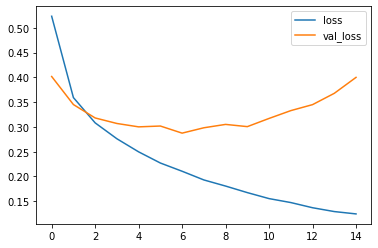

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend() # appears to be overfitting because val_loss goes up!

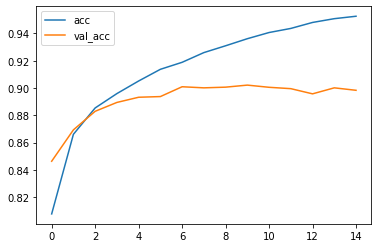

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend() 
# validation accuracy stays steady
# this is interesting to see when the validation loss simultaneously goes up
# means model is becoming more and more confident in its incorrect predictions
# when predictions become more and more incorrect, loss gets bigger and bigger
# a prediction becoming more incorrect when it was already incorrect will not affect accuracy

In [0]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print("Normalized Confusion Matrix")

  else:
    print("Confusion matrix, without normalization")

  # print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i,j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

Confusion matrix, without normalization


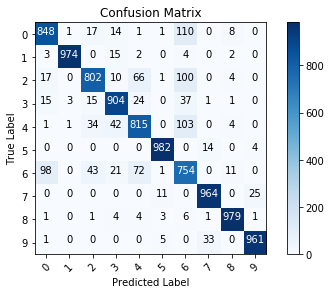

In [0]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(K)))

In [0]:
# Label mapping
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
AnkleBoot'''.split()

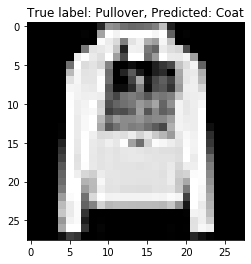

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title('True label: %s, Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));